<a href="https://colab.research.google.com/github/bhavika67/soft_computing/blob/main/PSO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Particle Swarm Optimization

Particle Swarm Optimization (PSO) is a population-based optimization technique inspired by the social behavior of birds flocking or fish schooling. Each "particle" in the swarm represents a potential solution, and particles move around the search space influenced by their personal best position and the global best position found by the swarm.

Best position: [-1.90144143e-13 -5.74136939e-13]
Best fitness score: 3.6578802005594146e-25


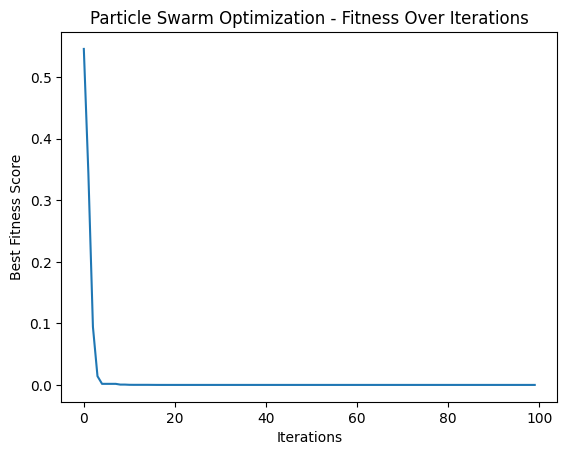

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PSO Parameters
DIMENSIONS = 2         # Number of dimensions (2D for easy visualization)
POPULATION_SIZE = 30   # Number of particles
MAX_ITERATIONS = 100   # Maximum number of iterations
INERTIA_WEIGHT = 0.5   # Inertia weight
COGNITIVE_COEFF = 1.5  # Cognitive coefficient (personal best influence)
SOCIAL_COEFF = 1.5     # Social coefficient (global best influence)

# Objective function to minimize (Sphere function)
def fitness_function(position):
    return np.sum(position**2)

# Initialize particle positions and velocities
def initialize_particles():
    positions = np.random.uniform(-10, 10, (POPULATION_SIZE, DIMENSIONS))
    velocities = np.random.uniform(-1, 1, (POPULATION_SIZE, DIMENSIONS))
    return positions, velocities

# Particle Swarm Optimization
def particle_swarm_optimization():
    # Initialize particles
    positions, velocities = initialize_particles()
    personal_best_positions = np.copy(positions)
    personal_best_scores = np.array([fitness_function(pos) for pos in positions])

    # Initialize global best
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    global_best_score = np.min(personal_best_scores)

    # Track the best score in each iteration for plotting
    best_scores = []

    for iteration in range(MAX_ITERATIONS):
        # Evaluate fitness of each particle
        scores = np.array([fitness_function(pos) for pos in positions])

        # Update personal and global bests
        for i in range(POPULATION_SIZE):
            if scores[i] < personal_best_scores[i]:
                personal_best_scores[i] = scores[i]
                personal_best_positions[i] = positions[i]

        # Update global best if found
        best_particle_index = np.argmin(personal_best_scores)
        if personal_best_scores[best_particle_index] < global_best_score:
            global_best_score = personal_best_scores[best_particle_index]
            global_best_position = personal_best_positions[best_particle_index]

        best_scores.append(global_best_score)

        # Update velocities and positions
        for i in range(POPULATION_SIZE):
            r1, r2 = np.random.rand(), np.random.rand()
            cognitive_velocity = COGNITIVE_COEFF * r1 * (personal_best_positions[i] - positions[i])
            social_velocity = SOCIAL_COEFF * r2 * (global_best_position - positions[i])
            velocities[i] = INERTIA_WEIGHT * velocities[i] + cognitive_velocity + social_velocity
            positions[i] += velocities[i]

    return global_best_position, global_best_score, best_scores

# Run the PSO and get the best solution
best_position, best_score, best_scores = particle_swarm_optimization()
print("Best position:", best_position)
print("Best fitness score:", best_score)

# Plotting the fitness over iterations
plt.plot(best_scores)
plt.title("Particle Swarm Optimization - Fitness Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Best Fitness Score")
plt.show()
